**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


In [2]:
import cv2
import matplotlib.pyplot as plt

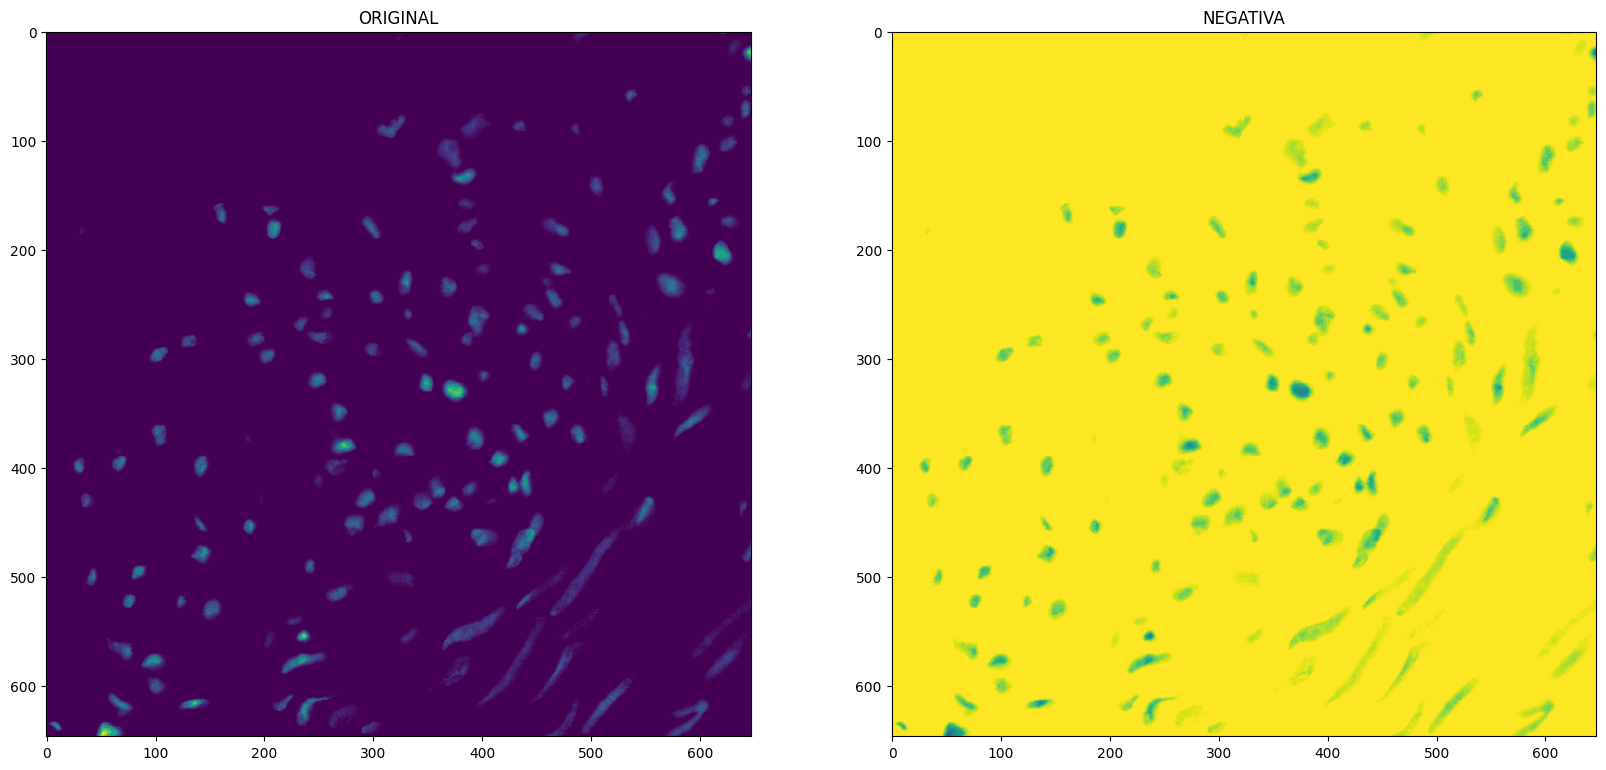

In [5]:
# negative image
img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
neg_img = 255 - img
f, axarr = plt.subplots(1, 2, figsize=(20, 20))

axarr[0].set_title('ORIGINAL')
axarr[0].imshow(img, vmin=0, vmax=255)

axarr[1].set_title('NEGATIVA')
axarr[1].imshow(neg_img, vmin=0, vmax=255)


2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



In [14]:
# code here

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

In [15]:
# code here